**LetsGrowMore Data Science Virtual Internship**

Author = **Rupak Dey**

Level 03 = **Advance Level Task**

Task 01 = **Develop a neural network that can read handwriting**

---



In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Printing the shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


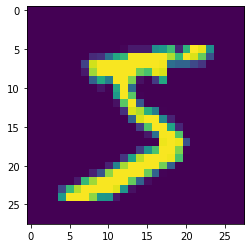

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
#Resizing the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#One-hot Encoding: 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Printing the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Build the CNN model
model = Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 50s 11ms/step - loss: 0.2730 - accuracy: 0.9533 - val_loss: 0.0790 - val_accuracy: 0.9749
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0755 - val_accuracy: 0.9774
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0942 - val_accuracy: 0.9758


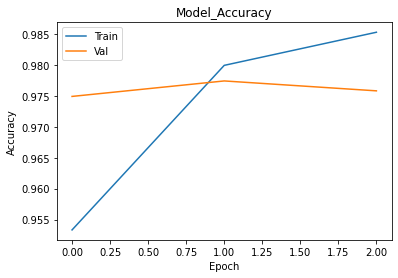

In [ ]:
#Visualise the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
#Show predictions as probabilities for the first 5 images in the test set
predictions = model.predict(X_test[:5])
predictions

array([[1.50083572e-08, 3.19281261e-17, 7.70175035e-08, 6.03344972e-07,
        8.24170241e-14, 9.32626047e-13, 3.09855240e-15, 9.99999285e-01,
        2.56032445e-10, 8.37659098e-09],
       [8.83659990e-09, 2.94125954e-07, 9.99999285e-01, 1.13273948e-11,
        1.79747124e-12, 2.70105173e-13, 4.11228228e-07, 1.00485954e-15,
        3.61862140e-09, 1.65167242e-15],
       [1.30176252e-08, 9.99812901e-01, 1.20196957e-04, 6.23528340e-09,
        6.40824292e-05, 2.05797637e-08, 6.32896445e-07, 1.41542085e-08,
        2.09748373e-06, 1.82770687e-10],
       [1.00000000e+00, 2.70479094e-17, 7.35602551e-11, 1.01242089e-15,
        3.58956810e-12, 3.82615328e-11, 8.88232710e-10, 9.81650094e-16,
        7.10084214e-10, 1.21891719e-09],
       [8.99271282e-11, 4.05151105e-14, 2.90411133e-11, 5.50748791e-13,
        9.99944210e-01, 6.44539938e-15, 1.47471113e-14, 5.02378954e-12,
        1.95295880e-11, 5.57574858e-05]], dtype=float32)

In [ ]:
#Print the predictions as number label for the first five images
print(np.argmax(predictions,axis=1))
#print the actual result
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


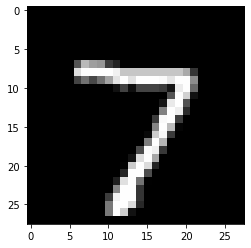

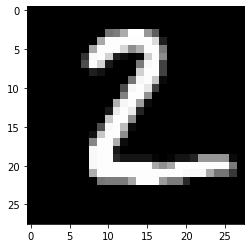

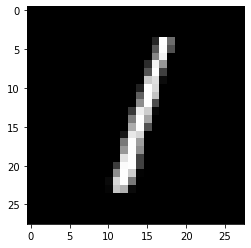

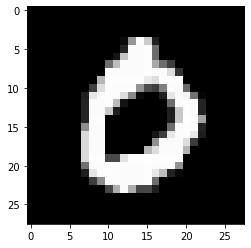

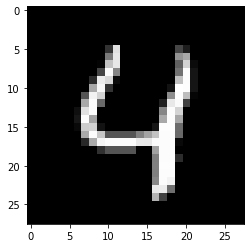

In [ ]:
#Show the first five images
for i in range(0,5):
  image = X_test[i]
  image = np.array(image,dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()